In [60]:
import numpy as np 
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy as sp

### 1. The data bw smoking.csv and the description of the data Birthweight Smoking Description.pdf are posted in the same directory as this homework on the course website. Read the description carefully.
    1.1 What is the description of the variable birthweight? 
   
        birth weight of infant (in grams)
    
    1.2 What is the description of the variable smoker?
    
        indicator equal to one if the mother smoked during pregnancy and zero, otherwise.

### 2. Download the data bw smoking.csv from the course website, and upload it to the jupyter hub like we did in the lab.

### 3. Create a new notebook (or use the existing one).

### 4. Import the packages like we did in the lab. (Refer to 103 all codes.ipynb section 1)

### 5. Load the data bw smoking.csv (Refer to 103 all codes.ipynb section 2)


In [61]:
smoke = pd.read_csv("bw_smoking.csv")

### 6. What is the average birth weight for the entire sample? What is the average infants’ birth weights for mothers who smoke? What is the average infants’ birth weights for mothers who don’t smoke?
    – To find the birth weights for mothers who smoke, you can create a new dataset consists of only mothers who smoke, and then find the mean using that dataset. Similarly for mothers who don’t smoke
    – Refer to section 3 and section 4.1 of 103 all codes.ipynb.

In [76]:
print("Average birth weight for the entire sample: " + 
      str(np.mean(smoke.birthweight)))
print("Average infants’ birth weights for mothers who smoke: " + 
      str(np.mean(smoke[smoke["smoker"]==1].birthweight)))
print("Average infants’ birth weights for mothers who don't smoke: " + 
      str(np.mean(smoke[smoke["smoker"]==0].birthweight)))

Average birth weight for the entire sample: 3382.933666666667
Average infants’ birth weights for mothers who smoke: 3178.831615120275
Average infants’ birth weights for mothers who don't smoke: 3432.0599669148055


### 7. Create a histogram of smoker. Refer to section 4.2 of 103 all codes.ipynb

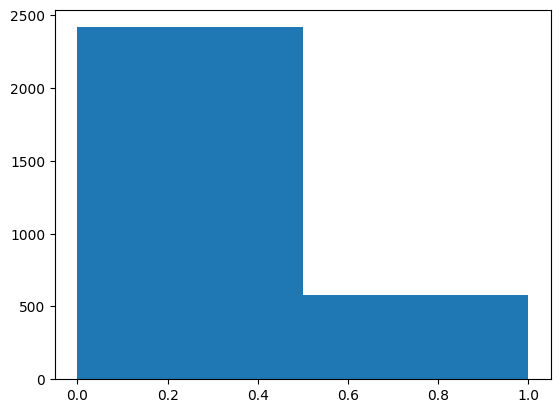

In [54]:
plt.hist(smoke.smoker, bins = 2)
plt.show() 

### 8. Create a histogram of birthweight. Refer to section 4.2 of 103 all codes.ipynb

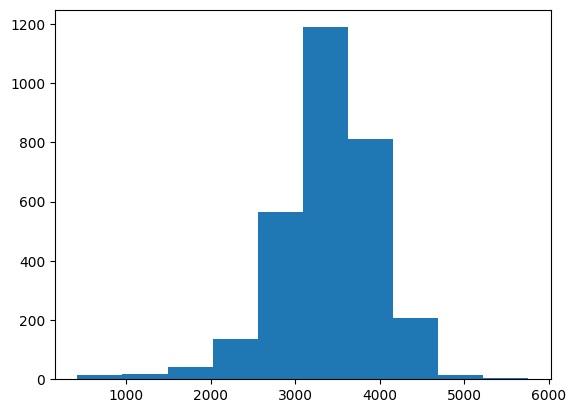

In [45]:
plt.hist(smoke.birthweight)
plt.show() 

### 9. Create a scatter plot of birthweight (on the y-axis) and smoker (on the x-axis). Clearly label and title your graph. Refer to section 4.3 of 103 all codes.ipynb

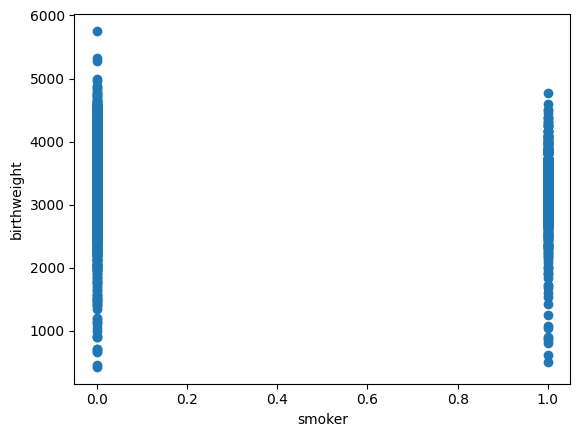

In [51]:
plt.scatter(smoke.smoker,smoke.birthweight)
plt.xlabel("smoker")
plt.ylabel("birthweight")
plt.show() 

### 10. Run a regression of birthweight on the binary variable smoker using the full dataset. Refer to section 5.1 of 103 all codes.ipynb


In [57]:
model = smf.ols(formula = 'birthweight ~ smoker', data=smoke)
results = model.fit(cov_type = 'HC1')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            birthweight   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     89.21
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           6.90e-21
Time:                        19:21:33   Log-Likelihood:                -23364.
No. Observations:                3000   AIC:                         4.673e+04
Df Residuals:                    2998   BIC:                         4.674e+04
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3432.0600     11.891    288.638      0.0

### 11. Create a scatter plot of birthweight (on the y-axis) and smoker (on the x-axis) with the regression line. Refer to section 5.3 of 103 all codes.ipynb

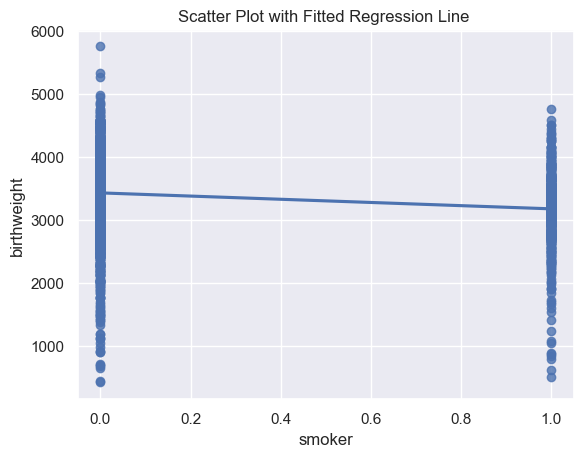

In [58]:
sns.set()
sns.regplot(x="smoker", y="birthweight", ci= None, data=smoke)
plt.xlabel('smoker')
plt.ylabel('birthweight')
plt.title('Scatter Plot with Fitted Regression Line ')
plt.show()

### 12. Interpret the coefficients from the regression. Using the results from the regression table, formulate and test the null hypothesis that there is no effect of mother’s smoking on infant’s birth weight. (You can either use t-statistic or using p-value

The coefficients of the linear regression model is -253.2284, which means that as everything else maintain equal, a smoker mother will have a 253.2284 weight less than a non smoker mother. As we can see that the p-value from the results above is around 0, which is less than our critical value of 0.05, we can conclude that there is a significant relationship between smoking and birthweight.


### 13. From the table, what is the 95% confidence interval for the effect of smoking on infant’s birth weight?

CI = [-305.776  , -200.681]

### 14. Create a scatter plot of residuals from the regression (on y-axis) and the regressor smoker (on x-axis). What are the definitions of homoskedasticity and heteroskedasticity? Are the residuals from this regression homoskedastic? Why or why not? Refer to section 5.4 of 103 all codes.ipynb

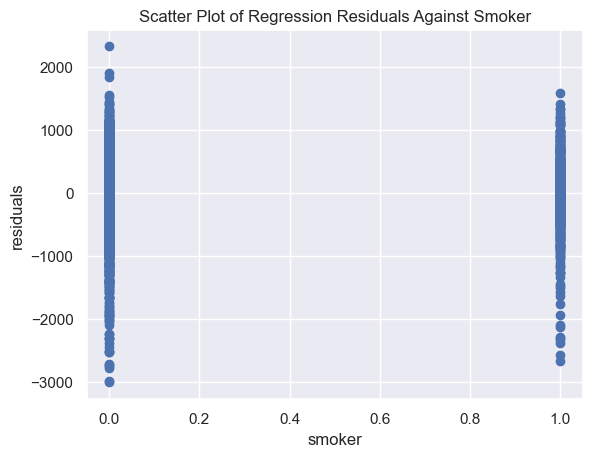

In [66]:
smoke['resid'] = results.resid

plt.scatter(smoke['smoker'], smoke['resid'])
plt.xlabel("smoker")
plt.ylabel("residuals")
plt.title('Scatter Plot of Regression Residuals Against Smoker')
plt.show()

Base on the residual plot we can see that the points are equally spread along line 0, and there is not a clear pattern of the residual plot. Therefore, we can conclude that this model is homoskedastic.

### 15. Does the OLS assumption, that the regressor smoker and the residual are uncorrelated, hold? Can you think of some other economic variables that maybe correlated with whether the mother smokes and with the infant’s birth weight?



In [74]:
model = smf.ols(formula = 'birthweight ~ educ', data=smoke)
results = model.fit(cov_type = 'HC1')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            birthweight   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     35.27
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           3.20e-09
Time:                        19:52:48   Log-Likelihood:                -23391.
No. Observations:                3000   AIC:                         4.679e+04
Df Residuals:                    2998   BIC:                         4.680e+04
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3011.8137     64.422     46.752      0.0